In [ ]:
!pip install swig
!pip install "gymnasium[box2d]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp312-cp312-linux_x86_64.whl size=2399000 sha256=0021a98ada59215941e5951c3848bb3943df66662868142b15f36799fb9dc5b4
  Stored in directory: /root/.cache/pip/wheels/2a/e9/60/774da0bcd07f7dc7761a8590fa2d065e4069568e78dcdc3318
Successfully built box2d-py


In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt

env = gym.make("FrozenLake-v1", render_mode="rgb_array")
obs, _ = env.reset()

frame = env.render()

plt.imshow(frame)
plt.axis("off")
plt.savefig("frozen_lake_figure.png", bbox_inches='tight', dpi=300)
plt.close()
env.close()

In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt

env = gym.make("LunarLander-v3", render_mode="rgb_array")
obs, _ = env.reset()

for _ in range(40):
    obs, reward, terminated, truncated, info = env.step(env.action_space.sample())

frame = env.render()

plt.figure(figsize=(6,6), dpi=150)
plt.imshow(frame)
plt.axis("off")
plt.savefig("lunar_lander_figure.png", bbox_inches="tight", dpi=200)
plt.close()

env.close()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Circle, FancyArrowPatch, Rectangle
import matplotlib.transforms as transforms
import numpy as np

def draw_rl_loop(fname="rl_loop.png"):
    fig, ax = plt.subplots(figsize=(8,5), dpi=200)
    ax.set_xlim(0,10)
    ax.set_ylim(0,6)
    ax.axis('off')

    env_box = FancyBboxPatch((6.5,3.2), 2.6, 1.4, boxstyle="round,pad=0.6", linewidth=1.5, facecolor="#c8efd0")
    agent_box = FancyBboxPatch((0.8,2.8), 2.2, 1.8, boxstyle="round,pad=0.6", linewidth=1.5, facecolor="#cfe7fb")
    action_box = FancyBboxPatch((3.8,3.0), 2.0, 1.2, boxstyle="round,pad=0.4", linewidth=1.5, facecolor="#ffe6c7")
    state_circle = Circle((6.0,1.6), 0.9, linewidth=1.5, facecolor="#ffd7d0")

    ax.add_patch(env_box)
    ax.add_patch(agent_box)
    ax.add_patch(action_box)
    ax.add_patch(state_circle)

    ax.text(7.8,3.9, "Environment", fontsize=12, fontweight='bold', ha='center', va='center')
    ax.text(1.9,3.7, "Agent", fontsize=12, fontweight='bold', ha='center', va='center')
    ax.text(4.8,3.5, "Action", fontsize=12, fontweight='bold', ha='center', va='center')
    ax.text(6.0,1.6, "State", fontsize=12, fontweight='bold', ha='center', va='center')

    arrow_props = dict(arrowstyle='->', linewidth=1.6, mutation_scale=18, color='k')
    a1 = FancyArrowPatch((1.9,2.8),(3.8,2.8), **arrow_props)
    a2 = FancyArrowPatch((5.8,2.2),(6.5,2.2), **arrow_props)
    a3 = FancyArrowPatch((6.0,2.6),(6.0,3.2), **arrow_props)
    a4 = FancyArrowPatch((6.0,1.6),(4.8,1.6), **arrow_props)
    a5 = FancyArrowPatch((3.8,3.9),(6.0,3.9), connectionstyle="arc3,rad=0.35", **arrow_props)
    a6 = FancyArrowPatch((6.0,3.8),(1.9,3.8), connectionstyle="arc3,rad=-0.55", **arrow_props)

    ax.add_patch(a1); ax.add_patch(a2); ax.add_patch(a3); ax.add_patch(a4); ax.add_patch(a5); ax.add_patch(a6)

    ax.text(2.85,2.95,"choose", fontsize=9, ha='center', va='bottom')
    ax.text(5.85,2.4,"transition", fontsize=9, ha='left', va='center')
    ax.text(6.55,3.6,"observation\nand reward", fontsize=9, ha='left', va='center')
    ax.text(3.5,4.25,"improve", fontsize=9, ha='center', va='center')

    plt.tight_layout()
    fig.savefig(fname, bbox_inches='tight')
    plt.close(fig)

def draw_states_vs_observations(fname="states_vs_obs.png"):
    fig = plt.figure(figsize=(9,5), dpi=200)
    ax_grid = fig.add_axes([0.05,0.12,0.4,0.76])
    ax_obs = fig.add_axes([0.55,0.18,0.35,0.6])

    n = 4
    ax_grid.set_xlim(0,n); ax_grid.set_ylim(0,n)
    ax_grid.set_xticks([]); ax_grid.set_yticks([])
    ax_grid.invert_yaxis()

    for i in range(n):
        for j in range(n):
            rect = Rectangle((j,i),1,1, edgecolor='k', facecolor='#f7fbff')
            ax_grid.add_patch(rect)

    ax_grid.text(0.5,0.5,"S0\n0.0", ha='center', va='center', fontsize=8)
    ax_grid.text(2.5,0.8,"S3\n1.2", ha='center', va='center', fontsize=8)
    ax_grid.text(1.5,1.5,"S6\n-1.0", ha='center', va='center', fontsize=8)
    ax_grid.text(3.5,2.2,"S11\n0.5", ha='center', va='center', fontsize=8)
    ax_grid.text(0.6,3.2,"Start", ha='left', va='center', fontsize=9, color='#7a7a7a')

    ax_grid.add_patch(Rectangle((2,2),1,1, edgecolor='red', facecolor='#ffd8d8', linewidth=1.5))
    ax_grid.add_patch(Rectangle((1,0),1,1, edgecolor='blue', facecolor='#d8f0ff', linewidth=1.5))

    ax_grid.set_title("State space (true states)", fontsize=11, pad=10)

    obs_img = np.ones((200,200,3), dtype=np.uint8) * 255
    rr, cc = np.ogrid[:200, :200]
    circle = (rr-60)**2 + (cc-60)**2 <= 18**2
    obs_img[circle] = np.array([200,30,30])
    rect_mask = (rr>120)&(rr<170)&(cc>110)&(cc<170)
    obs_img[rect_mask] = np.array([30,80,200])
    tri = np.array([[140,40],[170,80],[110,80]])
    import matplotlib.path as mpath
    tri_path = mpath.Path(tri)
    for y in range(200):
        for x in range(200):
            if tri_path.contains_point((x,y)):
                obs_img[y,x] = np.array([30,160,60])

    ax_obs.imshow(obs_img)
    ax_obs.axis('off')
    ax_obs.set_title("Agent observation (noisy / partial)", fontsize=11)

    fig.savefig(fname, bbox_inches='tight')
    plt.close(fig)

draw_rl_loop()
draw_states_vs_observations()

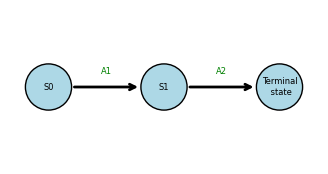

In [17]:
import matplotlib.pyplot as plt

# Define states and positions
states = {"S0": (0, 0), "S1": (1.5, 0), "Terminal\n state": (3, 0)}
radius = 0.3  # circle radius

fig, ax = plt.subplots(figsize=(5,2))

# Draw circles
for state, (x, y) in states.items():
    circle = plt.Circle((x, y), radius, color='lightblue', ec='black', zorder=2)
    ax.add_patch(circle)
    ax.text(x, y, state, ha='center', va='center', fontsize=6, zorder=3)

# Draw arrows with offset so they stop at the edge of circles
def draw_arrow(start, end, label):
    import numpy as np
    x0, y0 = start
    x1, y1 = end
    dx, dy = x1 - x0, y1 - y0
    dist = (dx**2 + dy**2)**0.5
    # Offset by radius
    x0_off = x0 + dx * radius/dist
    x1_off = x1 - dx * radius/dist
    y0_off = y0 + dy * radius/dist
    y1_off = y1 - dy * radius/dist
    ax.annotate("",
                xy=(x1_off, y1_off), xycoords='data',
                xytext=(x0_off, y0_off), textcoords='data',
                arrowprops=dict(arrowstyle="->", color='black', lw=2))
    # place label at midpoint
    ax.text((x0+x1)/2, (y0+y1)/2 + 0.2, label, ha='center', va='center', color='green', fontsize=6)

# Draw arrows
draw_arrow(states["S0"], states["S1"], "A1")
draw_arrow(states["S1"], states["Terminal\n state"], "A2")

# Adjust plot
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.axis('off')

plt.show()